In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

 
### Project Settings and Helper Functions


In [34]:
features = 6
fname = 'results' + str(features) + 'parsed.csv'

fi_compare = {}

def init():
    global feature_importance
    global feature_frequency
    global ca
    global features
    feature_importance  = {}
    feature_frequency = {}

    df = pd.read_csv(fname)

    ca = df['RFW CA']
    features = df['RFW AUC Features']

def print_table(data):
    """
    Takes in data , which is a list where each element is (feature, score) and prints out a nice table.
    :param data: [(feature1, score1), (feature2, score2) ... ]
    :type data: List
    :return: String representation of table
    :rtype: str
    """
    
    s = "%40s|\tScore\n" % 'Feature'
    s += '-' * len(s) + '\n'
    for feature, score in data:
        s += "%40s:\t%7.02f\n" % (feature, score)
    return s

def show_bar(data, title, y_label):
    """
    Plot a 
    :param data: 
    :return: 
    """
    
    y_pos = [x[0] for x in data]
    x_pos = [x[1] for x in data]
    plt.figure(figsize=(20,10))    
    plt.bar(list(range(len(y_pos))), x_pos, align='center', alpha=0.5, width=0.7)
    
    for i, p in enumerate(data):
        y, x = p
        plt.text(i, x, y, rotation='vertical') 
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

## Feature Ranking by Consistent Contribution (L2 Error)

In this section, the features are ranked by MSE (mean squared error) of accuracy when they appear.

Overview:
For every appearance of a feature, find its difference from perfect accuracy (100) and square the error. Finally, 
divide by the number of times the feature occurs.

The features at the top here are those which are consistently able to contribute (supposedly) individually to the 
output accuracy.




In [35]:

# initialize variables 
init()

# do MSE
for acc, f in zip(ca, features):
    for fp in f.split(','):
        fp = fp.strip()
        
        if fp not in feature_importance:
            feature_importance[fp] = (100 - acc * 100)**2
            feature_frequency[fp] = 1
        else:
            feature_importance[fp] += (100  - acc * 100)**2
            feature_frequency[fp] += 1

for k in feature_importance:
    feature_importance[k] = feature_importance[k] / feature_frequency[k]

for k,v in feature_importance.items():
    fi_compare[k] = [v]
    
# print results
print(print_table(sorted(feature_importance.items(), key=lambda x : x[1])))


                                 Feature|	Score
------------------------------------------------
                               nof_Rings:	 729.00
                               molVolume:	 730.92
                                 nof_HBA:	 739.64
                                  molPSA:	 741.82
                                    C_R0:	 749.73
                                 molLogS:	 759.49
                                  nof_OH:	 768.88
                                 nof_NH2:	 790.03
                                 molLogP:	 843.74
                                PSA/Area:	 860.79
                        posCharge/Volume:	 878.85
                           nof_posCharge:	 899.92
                                   C_sp3:	 915.80
                                 nof_PO4:	 917.16
                                nof_COOH:	 934.20
                                 nof_HBD:	 947.04
                                    C_R1:	 947.49
                                nof_SO3H:	 956.11
   

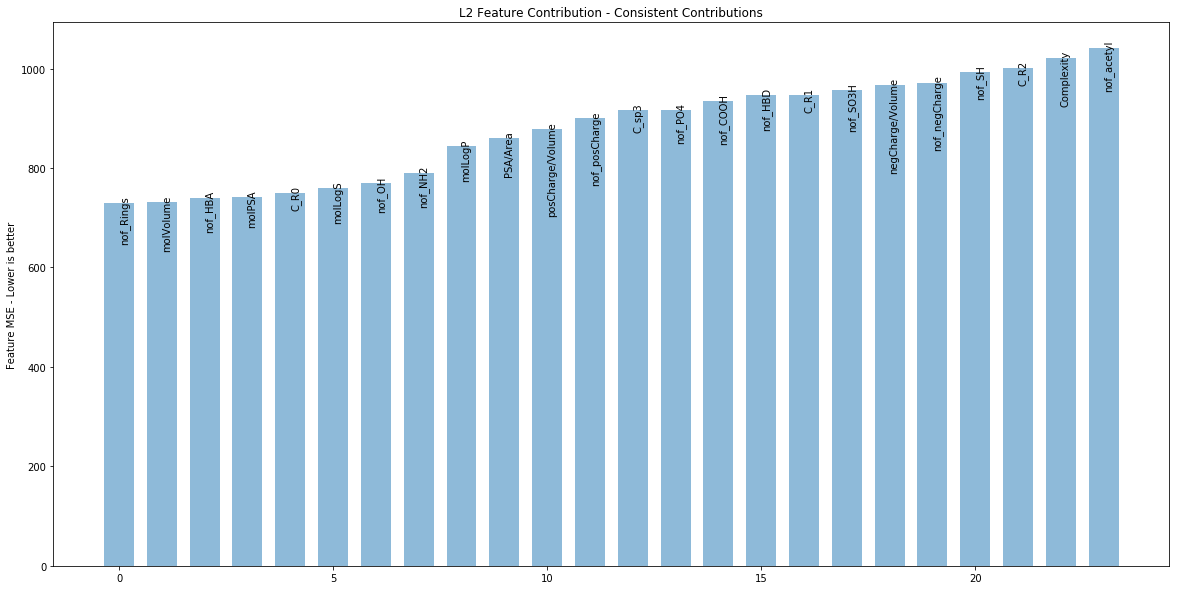

In [36]:
# visualize them
show_bar(sorted(feature_importance.items(), key=lambda x : x[1]), 'L2 Feature Contribution - Consistent '
                                                                  'Contributions', 'Feature MSE - Lower is better')



## Feature Ranking by Simple Contribution (L1 Error)

In this section, the features are ranked by mean error of accuracy when they appear.

Overview:
For every appearance of a feature, find its difference from perfect accuracy (100) and consider that the error. 
Finally, divide by the number of times the feature occurs.

The features at the top here are those which are on average able to contribute (supposedly) individually to the 
output accuracy.



In [37]:

#init variables
init()

# do mean error
for acc, f in zip(ca, features):
    for fp in f.split(','):
        fp = fp.strip()
        
        if fp not in feature_importance:
            feature_importance[fp] = (100 - acc * 100)
            feature_frequency[fp] = 1
        else:
            feature_importance[fp] += (100  - acc * 100)
            feature_frequency[fp] += 1

for k in feature_importance:
    feature_importance[k] = feature_importance[k] / feature_frequency[k]

for k,v in feature_importance.items():
    fi_compare[k].append(v)

# print results
print(print_table(sorted(feature_importance.items(), key=lambda x : x[1])))


                                 Feature|	Score
------------------------------------------------
                               molVolume:	  26.82
                                    C_R0:	  26.96
                                 nof_HBA:	  26.97
                               nof_Rings:	  27.00
                                  molPSA:	  27.20
                                 molLogS:	  27.33
                                  nof_OH:	  27.44
                                 nof_NH2:	  27.62
                                 molLogP:	  28.70
                                PSA/Area:	  28.94
                        posCharge/Volume:	  29.23
                           nof_posCharge:	  29.59
                                 nof_PO4:	  29.75
                                   C_sp3:	  29.80
                                nof_COOH:	  30.11
                                    C_R1:	  30.43
                                nof_SO3H:	  30.48
                                 nof_HBD:	  30.55
   

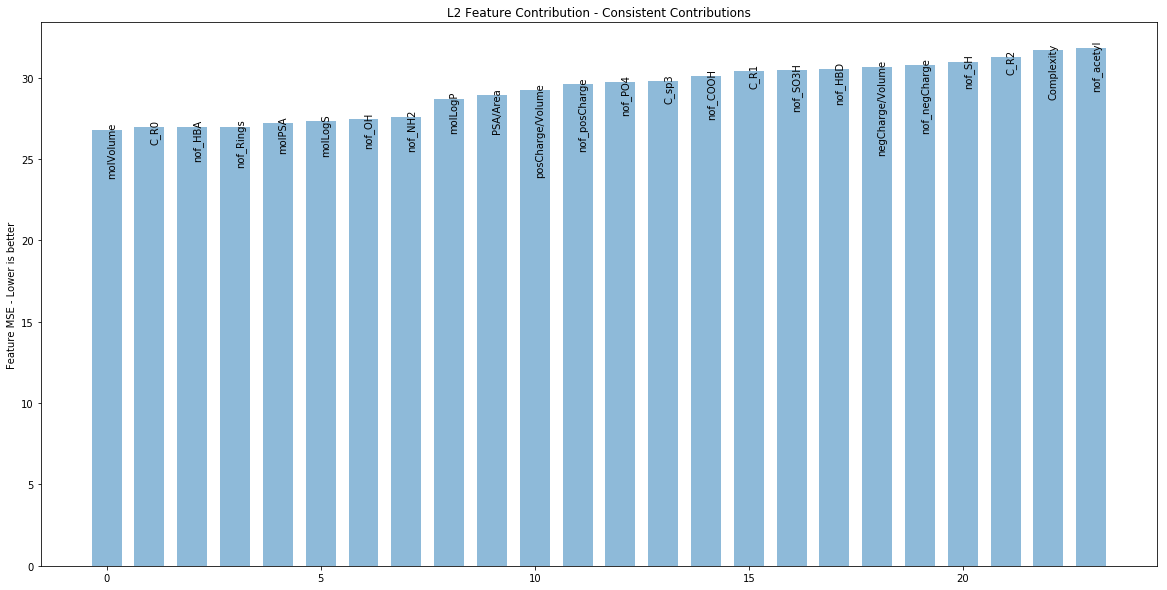

In [38]:
# visualize them
show_bar(sorted(feature_importance.items(), key=lambda x : x[1]), 'L2 Feature Contribution - Consistent '
                                                                  'Contributions', 'Feature MSE - Lower is better')



## Visual Comparison of Features Over Metric
https://pythonspot.com/matplotlib-bar-chart/
### Normalize against maximum, ie max = 1.0

<Figure size 1440x720 with 0 Axes>

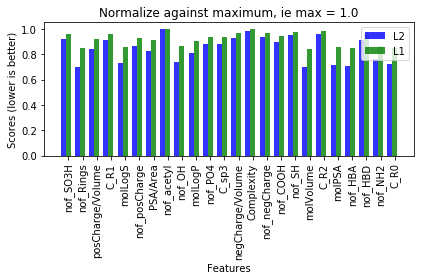

In [39]:
# data to plot
plt.figure(figsize=(20,10))    

n_groups = len(fi_compare.keys())
temp = [x for x in fi_compare.items()]
means_L2 = [x[1][0] for x in temp]
means_L2 = [float(i)/max(means_L2) for i in means_L2]
means_L1 = [x[1][1] for x in temp]
means_L1 = [float(i)/max(means_L1) for i in means_L1]
ylabels = [x[0] for  x in temp]


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_L2, bar_width,
alpha=opacity,
color='b',
label='L2')

rects2 = plt.bar(index + bar_width, means_L1, bar_width,
alpha=opacity,
color='g',
label='L1')

plt.xlabel('Features')
plt.ylabel('Scores (lower is better)')
plt.title('Normalize against maximum, ie max = 1.0')
plt.xticks(index + bar_width, ylabels, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()



### Normalize against sum, ie sum = 1.0

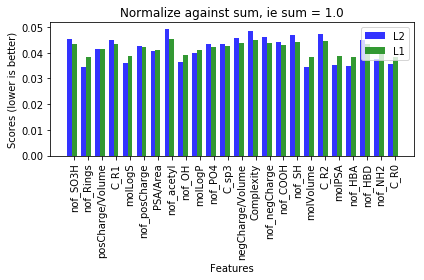

In [40]:
# data to plot
n_groups = len(fi_compare.keys())
temp = [x for x in fi_compare.items()]
means_L2 = [x[1][0] for x in temp]
means_L2 = [float(i)/sum(means_L2) for i in means_L2]
means_L1 = [x[1][1] for x in temp]
means_L1 = [float(i)/sum(means_L1) for i in means_L1]
ylabels = [x[0] for  x in temp]


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_L2, bar_width,
alpha=opacity,
color='b',
label='L2')

rects2 = plt.bar(index + bar_width, means_L1, bar_width,
alpha=opacity,
color='g',
label='L1')

plt.xlabel('Features')
plt.ylabel('Scores (lower is better)')
plt.title('Normalize against sum, ie sum = 1.0')
plt.xticks(index + bar_width, ylabels, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()


Based on consistency and average performance, the best features are: `molVolume, C_R0, nof_HBA, nof_Rings, molPSA, 
molLogS, nof_OH`.